In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib notebook

In [3]:
#from MyUnit import NaturalUnit
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.special import gamma 
from scipy.linalg import expm

In [4]:
import numpy as np
from numpy.linalg import eig
from scipy.integrate import simpson, trapezoid
from scipy.integrate import solve_ivp

In [5]:
import sys
sys.path.insert(0, '/home/chen/Code/varying_magnetic_field/')
import base as ba

# Solve the coupled ODE

<IPython.core.display.Javascript object>


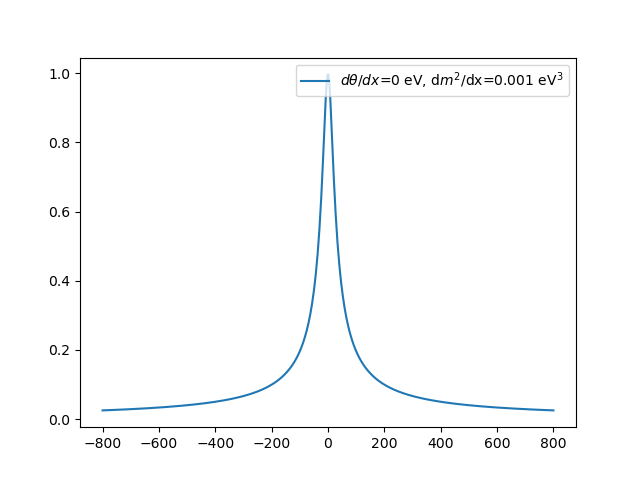

In [6]:
xi=-800
xe=800
ma=1
omega=1
cB=0.01
dmg2_over_om_dx = 0.001 #0.008
dthdx=0. #100
ma2_over_om = ma**2/omega
def mg2_over_om_fn(x): return ma2_over_om + (x)*dmg2_over_om_dx


x_arr = np.linspace(xi, xe, 500)
sin_alpha_arr = ba.mixing_angle(x_arr,
    ma=ma,
    omega=omega,
    cB=cB,
    mg2_over_om_fn=mg2_over_om_fn)

plt.subplots()
plt.plot(x_arr, sin_alpha_arr, label=r"$d\theta/dx$=%.1g eV, d$m^2$/dx=%.1g eV$^3$"
         %(dthdx,dmg2_over_om_dx))
plt.legend()

In [7]:
xi=-800
xe=800
ma=1
omega=1
cB=0.01
dmg2_over_om_dx = 0.001 #0.008
dthdx=0. #100
ma2_over_om = ma**2/omega
def theta_fn(x): return dthdx * x
def mg2_over_om_fn(x): return ma2_over_om + (x)*dmg2_over_om_dx



sol = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='RK45',
                   # method='DOP853',vectorized=True,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])


xi=-800
xe=800
ma=1
omega=1
cB=0.01
dmg2_over_om_dx = 0.001 #0.008
dthdx=0.2
ma2_over_om = ma**2/omega
def theta_fn(x): return dthdx * x
def mg2_over_om_fn(x): return ma2_over_om + (x)*dmg2_over_om_dx


sol_th_0 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='RK45',
                   # method='DOP853',vectorized=True,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])

xi=-2000
xe=2000
ma=1
omega=1
cB=0.01
dmg2_over_om_dx = 0.001 #0.008
dthdx=0.5
ma2_over_om = ma**2/omega
def theta_fn(x): return dthdx * x
def mg2_over_om_fn(x): return ma2_over_om + (x)*dmg2_over_om_dx


sol_th_1 = solve_ivp(ba.derivs,
                   [xi, xe],
                   [0.+0.j, 0.+0.j, 1.+0.j],     
                   method='RK45',
                   # method='DOP853',vectorized=True,
                   rtol=1e-10,
                   atol=1e-10,
                   args=[ma, omega, cB, mg2_over_om_fn, theta_fn])


<IPython.core.display.Javascript object>


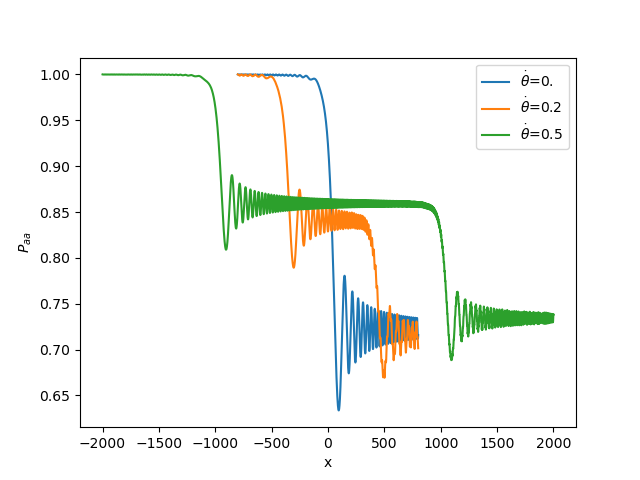

Text(0, 0.5, '$P_{aa}$')

In [8]:
plt.subplots()
plt.plot(sol.t, np.abs(sol.y[2])**2, label=r'$\dot\theta$=0.')
plt.plot(sol_th_0.t, np.abs(sol_th_0.y[2])**2, label=r'$\dot\theta$=0.2')
plt.plot(sol_th_1.t, np.abs(sol_th_1.y[2])**2, label=r'$\dot\theta$=0.5')
plt.legend()
plt.xlabel('x')
plt.ylabel(r'$P_{aa}$')
#plt.yscale('log')

<IPython.core.display.Javascript object>


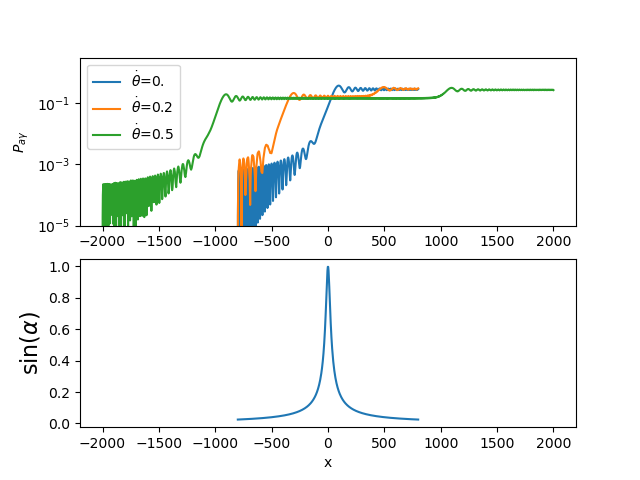

Text(0.5, 0, 'x')

In [9]:
fig = plt.figure()

ax = fig.add_subplot(211)
ax.plot(sol.t, 1-np.abs(sol.y[2])**2, label=r'$\dot\theta$=0.')
ax.plot(sol_th_0.t, 1-np.abs(sol_th_0.y[2])**2, label=r'$\dot\theta$=0.2')
ax.plot(sol_th_1.t, 1-np.abs(sol_th_1.y[2])**2, label=r'$\dot\theta$=0.5')
ax.legend()
ax.set_ylabel(r'$P_{a\gamma}$')
ax.set_ylim(1e-5, 3)
ax.set_yscale('log')

ax2 = fig.add_subplot(212, sharex=ax)
sin_alpha_arr = ba.mixing_angle(x_arr,
    ma=ma,
    omega=omega,
    cB=cB,
    mg2_over_om_fn=mg2_over_om_fn)
ax2.plot(x_arr, sin_alpha_arr)
ax2.set_ylabel(r'$\sin(\alpha)$', size =16)
ax2.set_xlabel('x')

